### Stock prediction
- Goal : Predict the stock price of L'Oreal
- Data : from WSJ https://www.wsj.com/market-data/quotes/FR/XPAR/OR/historical-prices
- Tutorial : https://www.geeksforgeeks.org/machine-learning/stock-price-prediction-using-machine-learning-in-python/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
dataset=pd.read_csv('prices_loreal.csv')
dataset.head()

,Date,Open,High,Low,Close,Volume
0,01/16/26,386.00,388.90,382.40,384.85,263542
1,01/15/26,394.35,396.35,387.10,387.15,378908
2,01/14/26,392.10,396.90,390.00,391.45,353521
3,01/13/26,391.00,392.70,388.45,391.40,317241
4,01/12/26,388.75,392.40,387.60,392.40,325849


In [6]:
print('Shape :', dataset.shape)
print('Missing values:',dataset.isnull().sum())
print('Columns name :', dataset.columns)

dataset['Date']=pd.to_datetime(dataset['Date'], format="%m/%d/%Y")
print('Data ranging from ', min(dataset['Date']), 'to ', max(dataset['Date']))



#reverse order of the rows for chronological order
dataset=dataset.iloc[::-1].reset_index()

Shape : (1282, 7)
Missing values: index      0
Date       0
 Open      0
 High      0
 Low       0
 Close     0
 Volume    0
dtype: int64
Columns name : Index(['index', 'Date', ' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')
Data ranging from  2021-01-18 00:00:00 to  2026-01-16 00:00:00


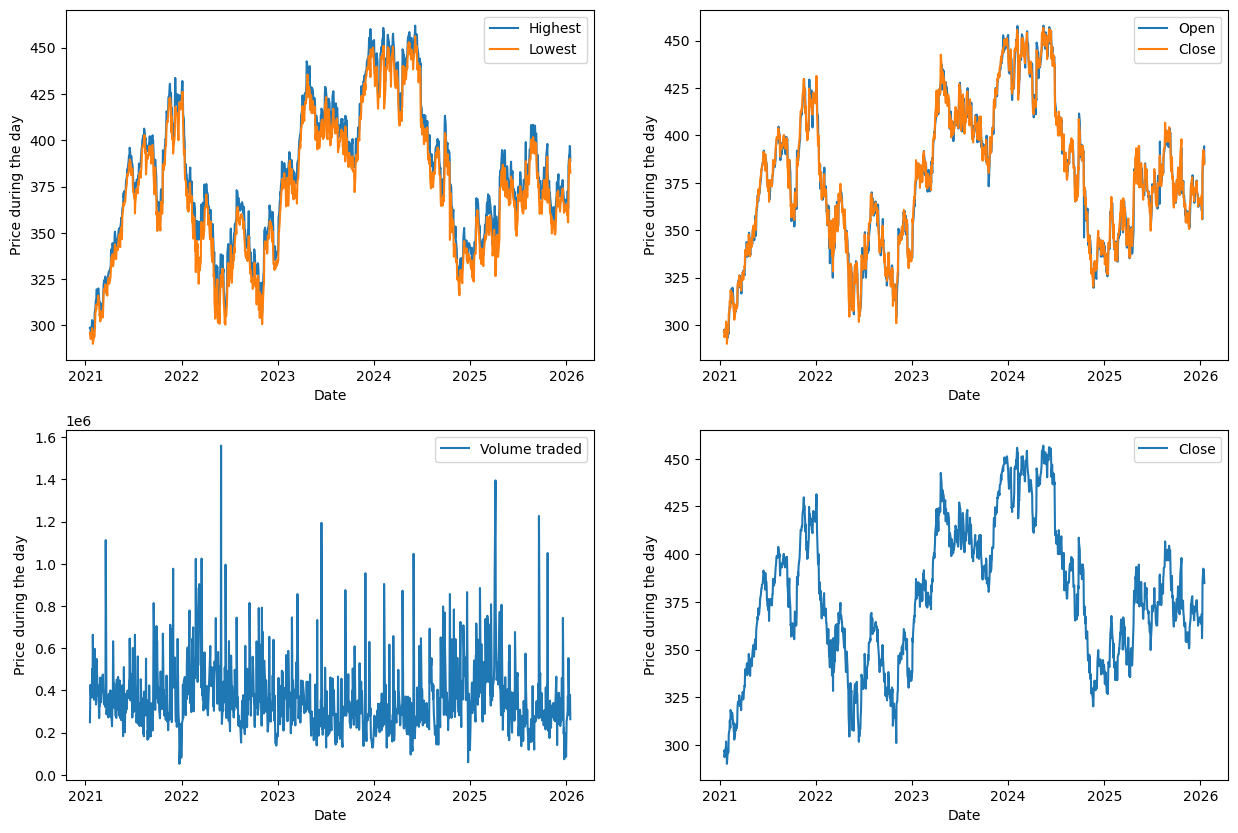

In [7]:
fig, ax=plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(dataset['Date'], dataset[' High'], label='Highest')
ax[0,0].plot(dataset['Date'], dataset[' Low'],label='Lowest' )
ax[0,0].set_xlabel('Date')
ax[0,0].set_ylabel('Price during the day')
ax[0,0].legend()

ax[0,1].plot(dataset['Date'], dataset[' Open'], label='Open')
ax[0,1].plot(dataset['Date'], dataset[' Close'],label='Close' )
ax[0,1].set_xlabel('Date')
ax[0,1].set_ylabel('Price during the day')
ax[0,1].legend()

ax[1,0].plot(dataset['Date'], dataset[' Volume'], label='Volume traded')
ax[1,0].set_xlabel('Date')
ax[1,0].set_ylabel('Price during the day')
ax[1,0].legend()

ax[1,1].plot(dataset['Date'], dataset[' Close'], label='Close')
ax[1,1].set_xlabel('Date')
ax[1,1].set_ylabel('Price during the day')
ax[1,1].legend()


plt.show()

In [8]:
#splitting time 
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

#check if end of quarter as it impacts 
dataset['End-Quarter']=np.where(dataset['Month']%3==0,1,0)
dataset.head()

,level_0,index,Date,Open,High,Low,Close,Volume,Year,Month,Day,End-Quarter
0,1281,0,2026-01-16,386.00,388.90,382.40,384.85,263542,2026,1,16,0
1,1280,1,2026-01-15,394.35,396.35,387.10,387.15,378908,2026,1,15,0
2,1279,2,2026-01-14,392.10,396.90,390.00,391.45,353521,2026,1,14,0
3,1278,3,2026-01-13,391.00,392.70,388.45,391.40,317241,2026,1,13,0
4,1277,4,2026-01-12,388.75,392.40,387.60,392.40,325849,2026,1,12,0


Difference between end of quarter and rest of the year


,Open,High,Low,Close,Volume
End-Quarter,,,,,
0,377.506096,381.105721,373.867644,377.696483,358756.583822
1,378.226457,381.842774,374.663823,378.268298,374640.247086


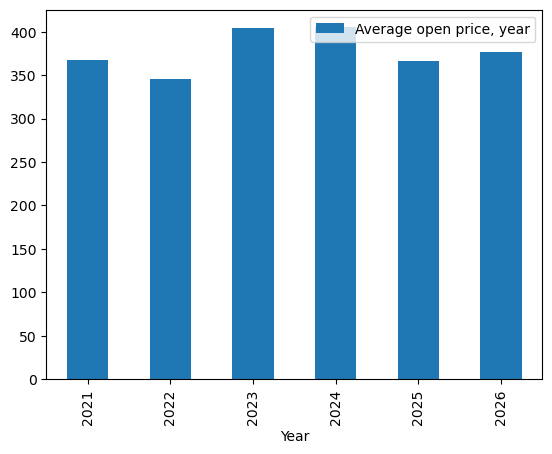

In [9]:
# average open price depeding on the year
grouped=dataset.groupby('Year').mean()
hist=grouped.plot.bar( y=' Open', label='Average open price, year')


#average price depeding on whether it is the quarter end(results of companies out)
grouped_qt=dataset.groupby('End-Quarter').mean().drop(columns=['level_0', 'index','Date', 'Year','Month','Day'])
print('Difference between end of quarter and rest of the year')
grouped_qt

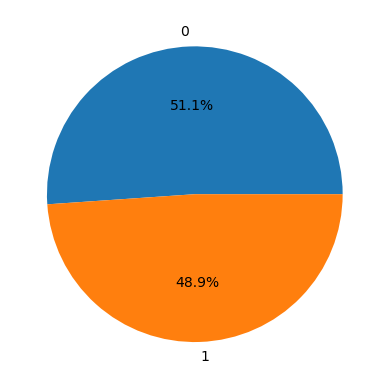

In [10]:
dataset['Target']=np.where(dataset[' Close'].shift(-1)>dataset[' Close'],1,0)
plt.pie(dataset['Target'].value_counts(), labels=[0,1], autopct='%1.1f%%')
plt.show()

-> balanced dataset

check for correlation of added features

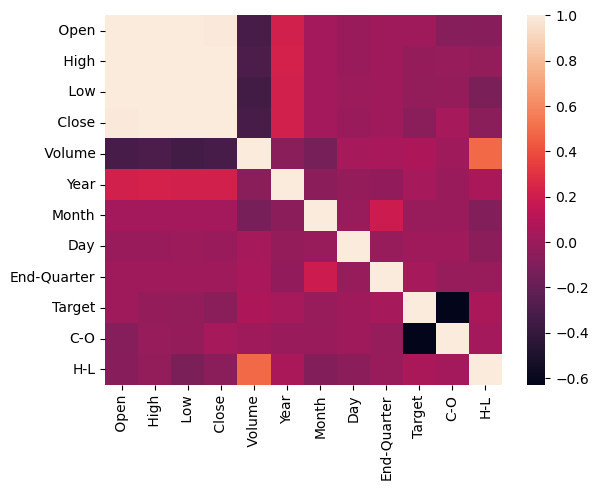

In [11]:
dataset['C-O']=dataset[' Close']-dataset[' Open']
dataset['H-L']=dataset[' High']-dataset[' Low']
sns.heatmap(dataset.drop(columns=['Date','level_0','index']).corr())

plt.show()


In [ ]:
uncorr_df=dataset[['End-Quarter', 'C-O','H-L']].iloc[:-30] #30 last to check with actual target
target=dataset['Target'].iloc[:-30]

X_train,X_test,Y_train, Y_test=train_test_split(uncorr_df, target,  test_size=0.3)
print(X_train.shape,X_test.shape)

(876, 3) (376, 3)


In [24]:
model=LogisticRegression().fit(X_train,Y_train)

Y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_pred,Y_test))
print(model.score(X_test,Y_test))

[[154  41]
 [ 29 152]]
0.8138297872340425


-> better accuracy than random guessing
-> probably because the stock is not volatile

In [ ]:
#See for last 30 days if good model


target_new=target=dataset['Target'].iloc[-30:]
target_pred=model.predict(dataset[['End-Quarter', 'C-O','H-L']].iloc[-30:])
date=dataset['Date'].iloc[-30:]

print('Good predictions', sum(target_pred==target_new))
print('Bad predictions', sum(target_pred!=target_new))


Good predictions 25
Bad predictions 5


Not bad model, still bad predictions because market volatile

maybe check with more volatile stock since L'Oreal is pretty stable

NameError: name 'math' is not defined